#**Project Title: Cross-validated linear regression models that predict the weight of a vehicle.**



## **Project Members:**
- Meher Venkat Karri
- Vedant Patel
- Venkata Sainath Rameswarapu

#**Introduction**

The goal is to predict the curb weight of passenger vehicles using linear regression models. Here we have a dataset sourced from the UCI Machine Learning Repository, which contains 205 observations and 26 attributes. Out of these, the "curb-weight" will serve as the response variable, and several other variables, including height, width, engine size, and others, will be used as explanatory variables.

As per the instruction we are using only the below 8 attributes to predict the response variable 'curb-weight':
  height, width, length, wheel-base,engine-size, horsepower, peak-rpm, and city-mpg

**Plan:**

- **Data Loading:** The dataset will be loaded into a Pandas DataFrame from GitHub repo.
- **Exploratory Data Analysis (EDA):** We'll perform exploratory analysis to understand the relationships between the curb-weight and the explanatory variables. This will include visualizations and statistical summaries.
- **Model Construction:** linear regression models will be built, each using different sets of explanatory variables, based on insights from the EDA.
- **K-Fold Cross-Validation:** The models will be evaluated using K-fold cross-validation to assess their performance on unseen data. The model with the best performance will be selected.
- **Conclusion:** A summary of the findings, including the model performance and insights gained from the analysis.

#**Importing libraries**

In [ ]:
# importing all the necessary libraries required
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import  KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#**Fetching Dataset**

In [ ]:
# fetching data from github repo     -Meher
data = pd.read_csv('https://raw.githubusercontent.com/Vedant278/DAV-6150/main/M2_Data.csv', header = None)

In [ ]:
#  -Meher
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# -Meher
new_column_names= ['symboling','normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
# -Meher
data.columns = new_column_names
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# -Meher
data.shape

(205, 26)

In [ ]:
# replacing the '?' with null to identify the null values -Meher
data.replace('?', pd.NA, inplace=True)

In [ ]:
# -Meher
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Creating the new dataframe with required attributes  -Meher
required_col = ['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower','peak-rpm','city-mpg', 'curb-weight']
df = data[required_col]

In [ ]:
# checking the null values -Meher
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   height       205 non-null    float64
 1   width        205 non-null    float64
 2   length       205 non-null    float64
 3   wheel-base   205 non-null    float64
 4   engine-size  205 non-null    int64  
 5   horsepower   203 non-null    object 
 6   peak-rpm     203 non-null    object 
 7   city-mpg     205 non-null    int64  
 8   curb-weight  205 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.5+ KB


In [ ]:
# changing the Object datatype to float  -Meher
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

In [ ]:
# -Meher
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   height       205 non-null    float64
 1   width        205 non-null    float64
 2   length       205 non-null    float64
 3   wheel-base   205 non-null    float64
 4   engine-size  205 non-null    int64  
 5   horsepower   203 non-null    float64
 6   peak-rpm     203 non-null    float64
 7   city-mpg     205 non-null    int64  
 8   curb-weight  205 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 14.5 KB


In [ ]:
# -Meher
df.head()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
0,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
1,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
2,52.4,65.5,171.2,94.5,152,154.0,5000.0,19,2823
3,54.3,66.2,176.6,99.8,109,102.0,5500.0,24,2337
4,54.3,66.4,176.6,99.4,136,115.0,5500.0,18,2824


In [ ]:
# -Meher
df.describe()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
count,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,203.000000,205.000000,205.000000
mean,53.724878,65.907805,174.049268,98.756585,126.907317,104.256158,5125.369458,25.219512,2555.565854
std,2.443522,2.145204,12.337289,6.021776,41.642693,39.714369,479.334560,6.542142,520.680204
min,47.800000,60.300000,141.100000,86.600000,61.000000,48.000000,4150.000000,13.000000,1488.000000
25%,52.000000,64.100000,166.300000,94.500000,97.000000,70.000000,4800.000000,19.000000,2145.000000
50%,54.100000,65.500000,173.200000,97.000000,120.000000,95.000000,5200.000000,24.000000,2414.000000
75%,55.500000,66.900000,183.100000,102.400000,141.000000,116.000000,5500.000000,30.000000,2935.000000
max,59.800000,72.300000,208.100000,120.900000,326.000000,288.000000,6600.000000,49.000000,4066.000000


##Imputing missing values

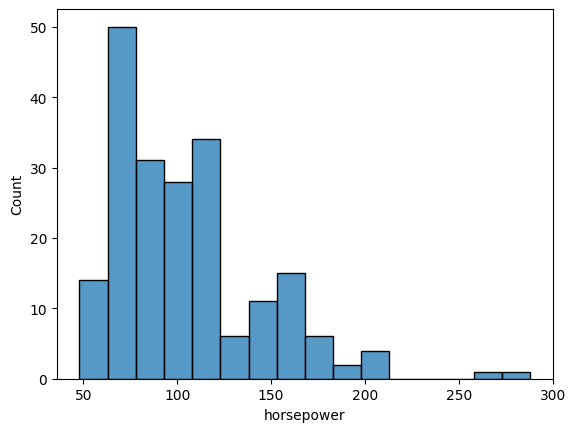

In [ ]:
# analysing the distribution using histplot  - Vedant
sns.histplot(df['horsepower'])
plt.show()

The histogram shows the distribution of horsepower in a dataset. The majority of cars have horsepower between 50 and 150, with the highest concentration around 75-100 horsepower. There is a noticeable drop in frequency for vehicles with horsepower greater than 150, with very few cars exceeding 200 horsepower. The distribution is right-skewed, indicating fewer high-horsepower cars.

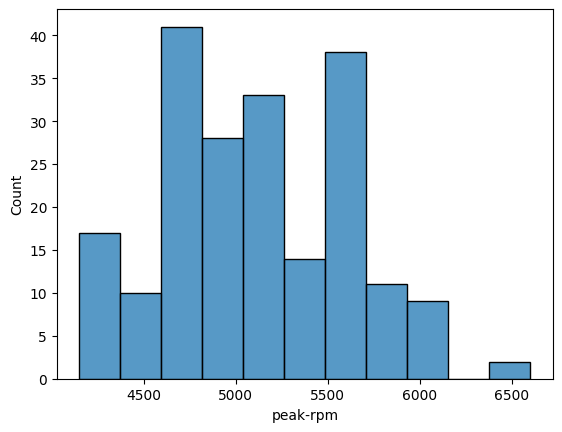

In [ ]:
# analysing the distribution using histplot  - Vedant
sns.histplot(df['peak-rpm'])
plt.show()

This histogram depicts the distribution of peak RPM values in a dataset. The majority of cars have a peak RPM between 4500 and 5500, with the highest concentration around 5000 RPM. There are fewer cars with peak RPM values above 6000, and the distribution is slightly skewed to the right, indicating a gradual decrease in frequency as peak RPM increases. Very few cars exceed 6500 RPM.

In [ ]:
# Imputing the missing values with the median to maintain the Skewness of the distribution - Vedant
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].median(), inplace=True)

In [ ]:
# - vedant
print(df.horsepower.isnull().sum())
print(df.horsepower.isnull().sum())

0
0


In [ ]:
# - vedant
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   height       205 non-null    float64
 1   width        205 non-null    float64
 2   length       205 non-null    float64
 3   wheel-base   205 non-null    float64
 4   engine-size  205 non-null    int64  
 5   horsepower   205 non-null    float64
 6   peak-rpm     205 non-null    float64
 7   city-mpg     205 non-null    int64  
 8   curb-weight  205 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 14.5 KB


#**EDA**

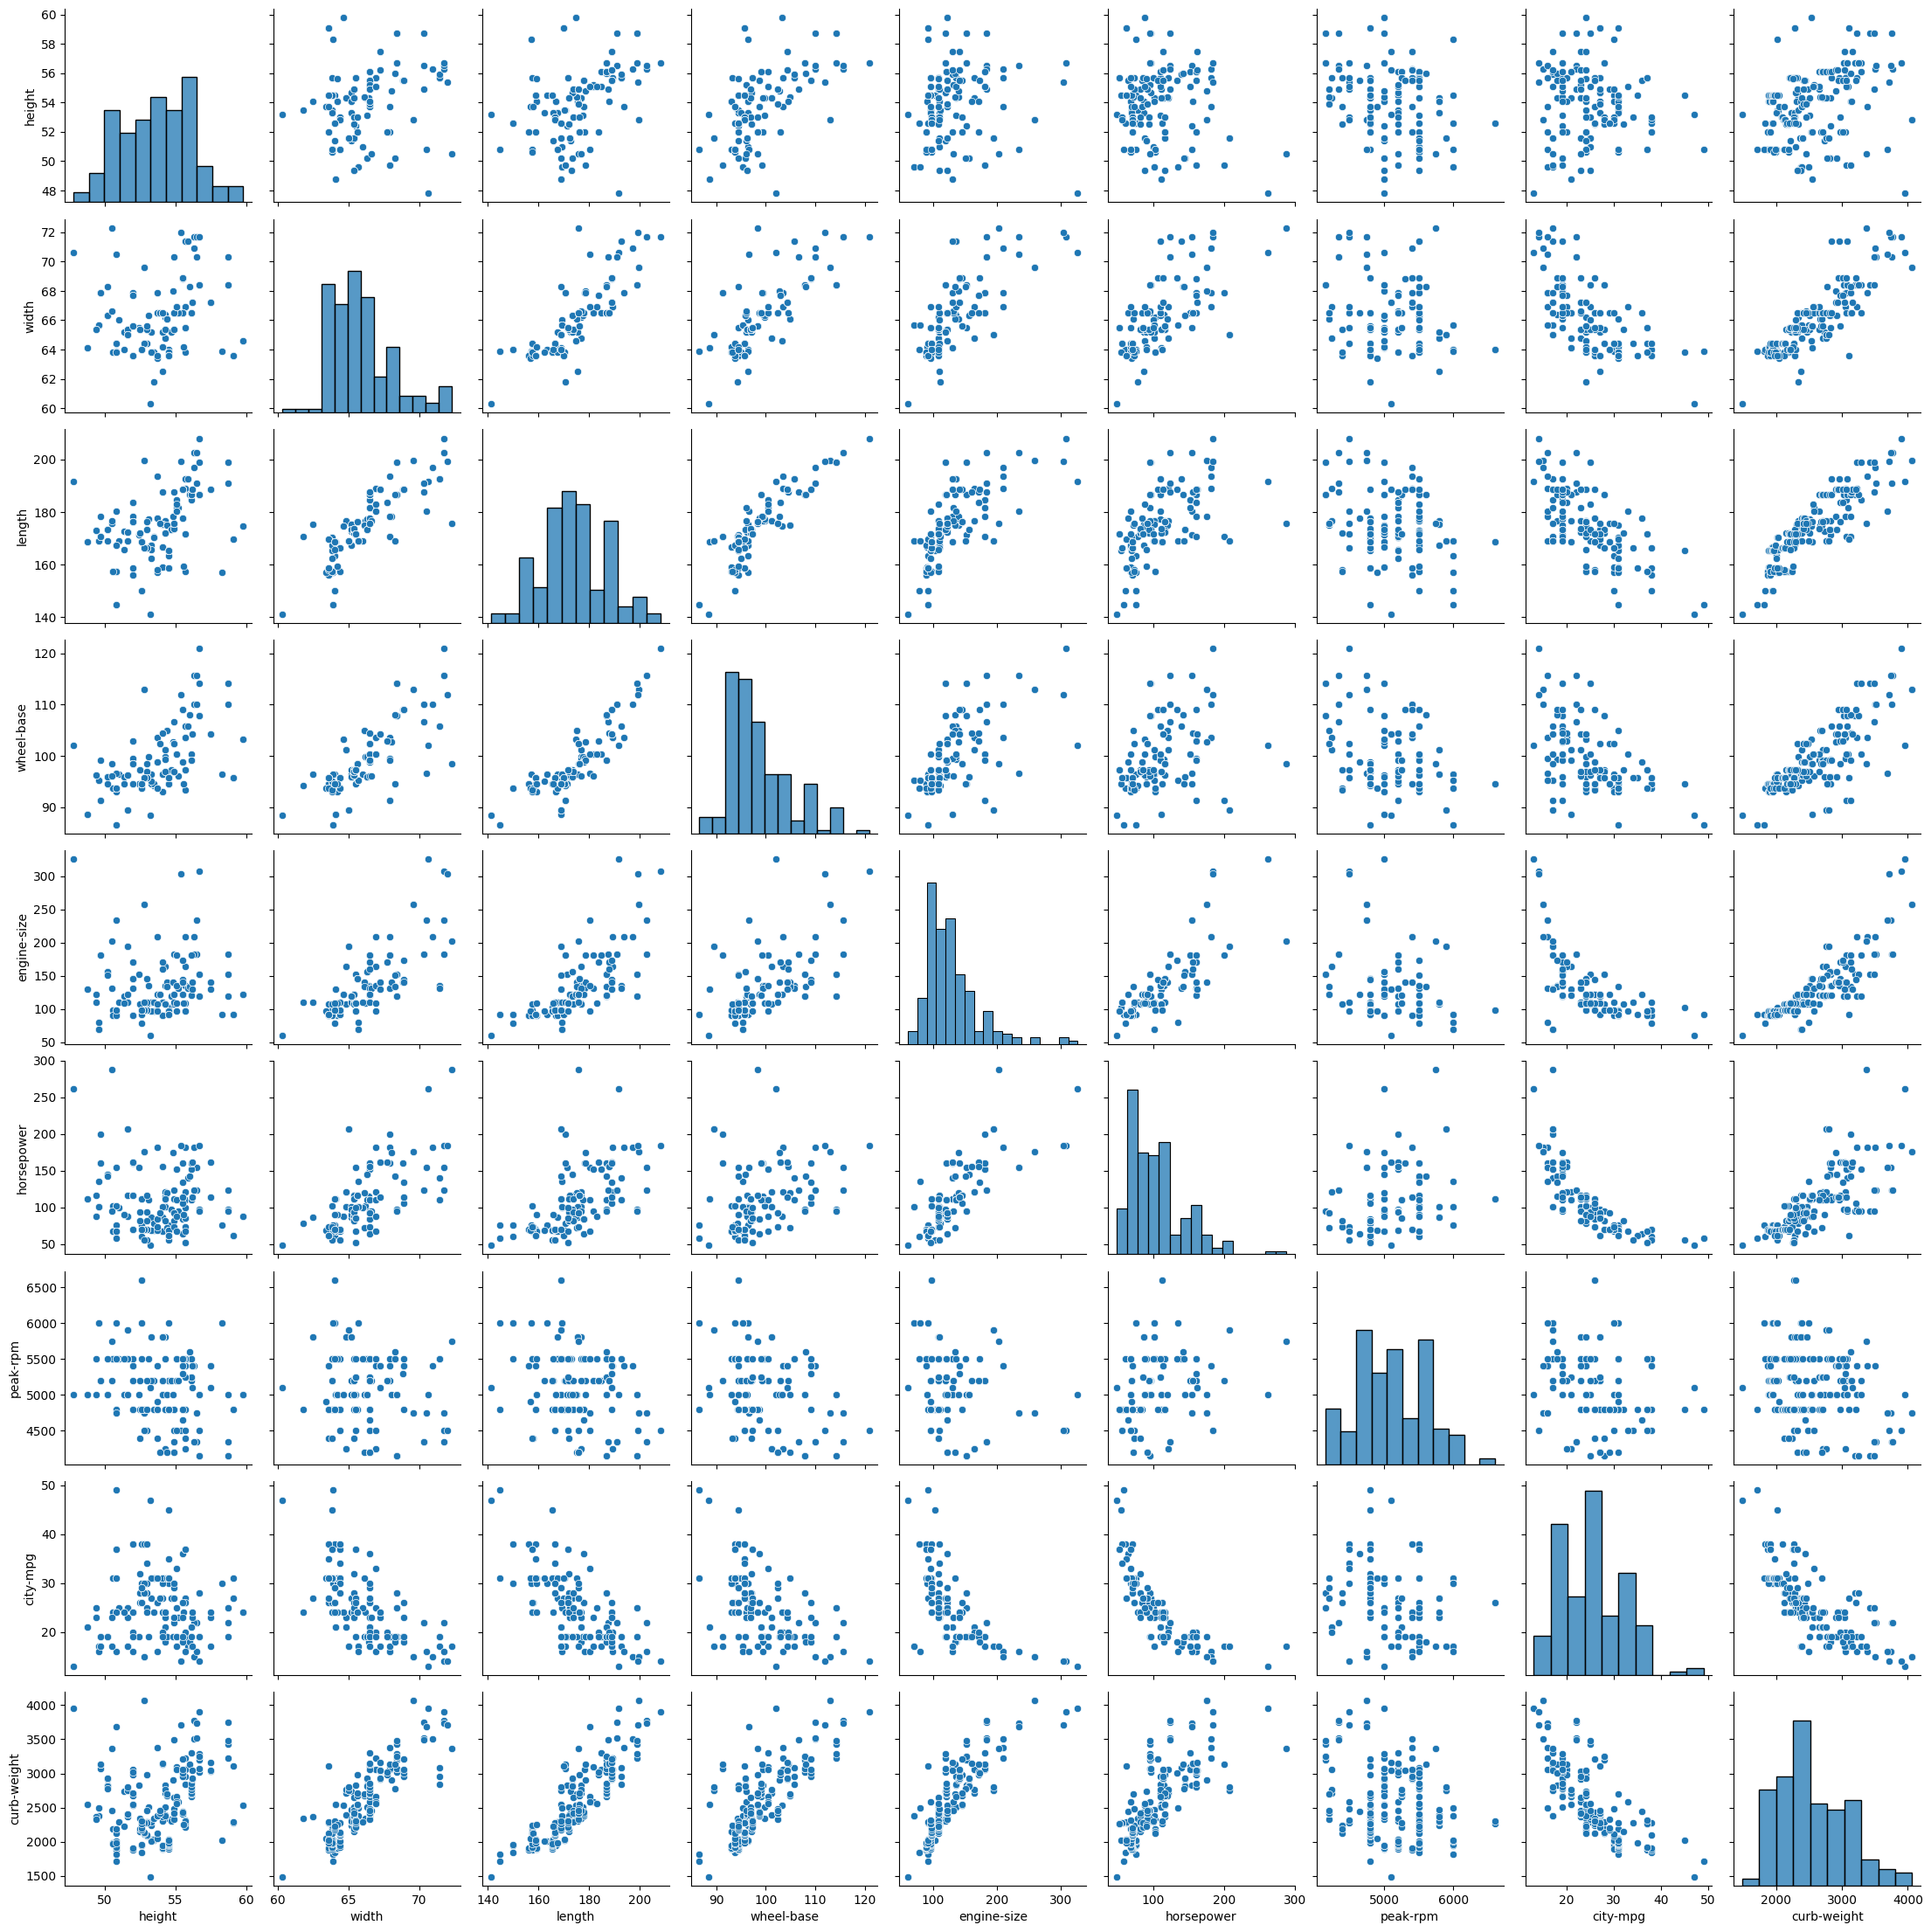

In [ ]:
# analysing the relationships between all the attributes using scatter plots - Vedant
sns.pairplot(data=df, vars= required_col)
plt.show()

- The pair plot reveals several key relationships between car attributes, such as strong positive correlations between engine size, curb weight, and horsepower, indicating that larger and heavier cars tend to have more powerful engines.
- There's a negative correlation between city-mpg and both engine size and horsepower, suggesting that more powerful cars are less fuel-efficient.
- The distributions of variables like horsepower, curb weight, and engine size are right-skewed, while others like height and width appear more normally distributed.
- This plot highlights how different car characteristics are interrelated.

In [ ]:
# Creating a correlation matrix to identify the direct or inverse relationships between attributes - Vedant
corr_matrix = df[required_col].corr()
corr_matrix

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
height,1.000000,0.279210,0.491029,0.589435,0.067149,-0.109286,-0.321113,-0.048640,0.295572
width,0.279210,1.000000,0.841118,0.795144,0.735433,0.641337,-0.219374,-0.642704,0.867032
length,0.491029,0.841118,1.000000,0.874587,0.683360,0.553337,-0.286362,-0.670909,0.877728
wheel-base,0.589435,0.795144,0.874587,1.000000,0.569329,0.352876,-0.361338,-0.470414,0.776386
engine-size,0.067149,0.735433,0.683360,0.569329,1.000000,0.810216,-0.244383,-0.653658,0.850594
horsepower,-0.109286,0.641337,0.553337,0.352876,0.810216,1.000000,0.130565,-0.802170,0.750927
peak-rpm,-0.321113,-0.219374,-0.286362,-0.361338,-0.244383,0.130565,1.000000,-0.114230,-0.266358
city-mpg,-0.048640,-0.642704,-0.670909,-0.470414,-0.653658,-0.802170,-0.114230,1.000000,-0.757414
curb-weight,0.295572,0.867032,0.877728,0.776386,0.850594,0.750927,-0.266358,-0.757414,1.000000


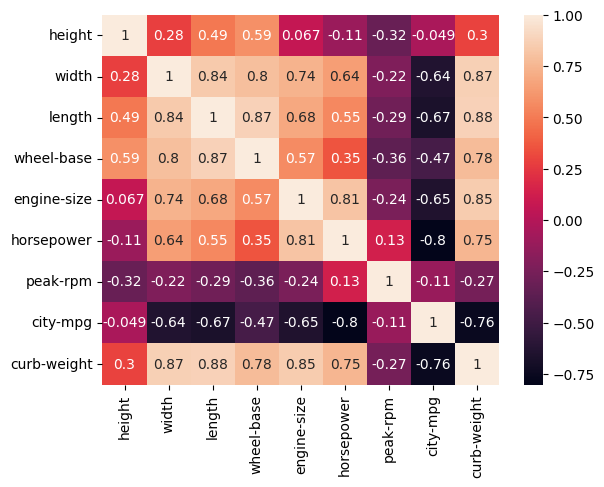

In [ ]:
# Visualizing the above corr matrix using heatmap - Vedant
sns.heatmap(corr_matrix, annot=True)
plt.show()

- The correlation heatmap shows strong positive correlations between width, length, wheelbase, engine size, horsepower, and curb weight, indicating that these variables tend to increase together.
- Curb weight has high correlations with width (0.87), length (0.88), engine size (0.85), and horsepower (0.75), suggesting heavier cars tend to be larger and more powerful.
- City-mpg has strong negative correlations with engine size (-0.65), horsepower (-0.80), and curb weight (-0.76), indicating that larger, more powerful cars are less fuel efficient.
- Peak RPM shows weak correlations with other variables, suggesting it is less related to the physical dimensions and power of the cars.

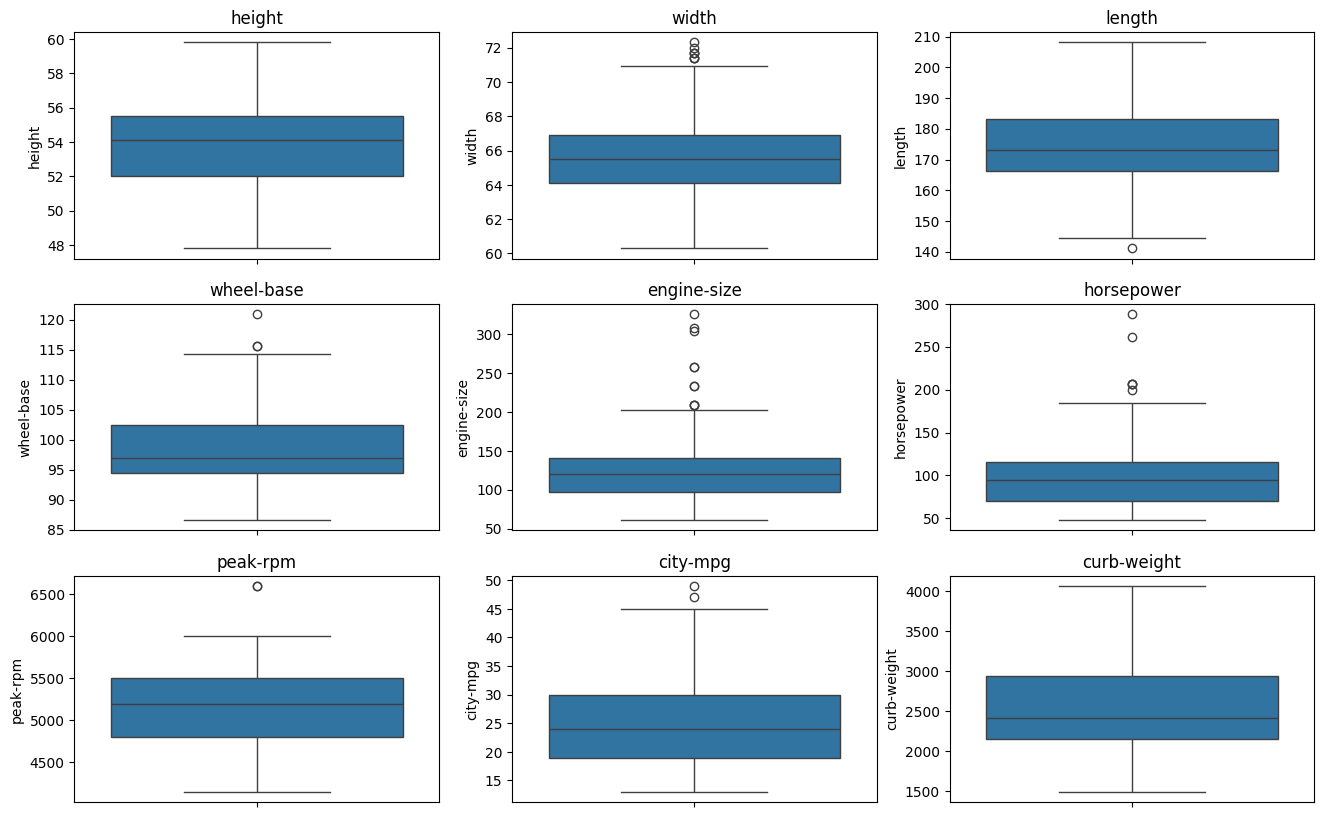

In [ ]:
# Using Boxplot to identify and examine outliers for each attribute -Sainath
plt.figure(figsize=(16,10))
for i,j in itertools.zip_longest(required_col,range(len(required_col))):
  plt.subplot(3,3,j+1)
  sns.boxplot(df[i])
  plt.title(i)

- The box plots show the distribution of attributes, revealing outliers in width, engine-size, horsepower, and wheel-base.
- City-mpg also has some high outliers, indicating better fuel efficiency in a few cars.
- Most attributes, like height and curb-weight, are symmetrically distributed, while horsepower and engine-size are right-skewed with more variability.
- Overall, engine-size and horsepower shows more variability and a few number of outliers, reflecting cars with more powerful engines.

# **Perform K-Fold Cross-Validation**


Creating a function to perform K-fold cross-validation to calculate the R^2 scores for a linear regression model. It will systematically evaluate the model across multiple folds(where k=5) ensuring that all data points are used both for training and testing.

In [ ]:
# Using statsmodel and Kfold to create / evaluate the model - Sainath, Vedant and Meher
def cross_validated_r2(df, independent_vars, dependent_var, k=5):
     X = df[independent_vars]
     y = df[dependent_var]
     kf = KFold(n_splits=k, shuffle=True, random_state=100)
     r2_scores = []

    #The dataset is split into k(5)folds, and the model is trained on k-1(4) folds, then tested on the remaining fold.
     for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        #Adding a constant(intercept) to the regression model to ensure the model fits a line which doesn't need to pass through origin.
        X_train = sm.add_constant(X_train)
        X_test = sm.add_constant(X_test)

        #Creating and fitting a regression model using OLS(Ordinary Least Squares) in SM lib
        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

     average_r2 = sum(r2_scores) / len(r2_scores)

     return r2_scores, average_r2, model, y_test, y_pred
  #The function performs cross-validation of the linear regression model to provide R^2 scores.

####Model 1

In [ ]:
r2_scores_1, avg_r2_1, model1,actual_values, predicted_values = cross_validated_r2(df, ['height', 'width', 'length'], 'curb-weight', k=5)
print("R^2 scores for ['height', 'width', 'length']:", r2_scores_1)
print("Average R^2 for ['height', 'width', 'length']:", avg_r2_1)


R^2 scores for ['height', 'width', 'length']: [0.8444368530120555, 0.7117171068740861, 0.8167386584609609, 0.879234959372683, 0.7434554837059315]
Average R^2 for ['height', 'width', 'length']: 0.7991166122851434


In [ ]:
Prediction_1 = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
Prediction_1

,Actual,Predicted
2,2823,2482.853594
4,2824,2656.951504
8,3086,3499.802654
14,3055,2993.889288
24,1967,2006.848439
34,1956,1776.682227
49,3950,3621.194162
53,1945,2200.194036
58,2500,2519.320663
60,2410,2665.201005


In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            curb-weight   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     313.2
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.01e-66
Time:                        23:44:30   Log-Likelihood:                -1102.1
No. Observations:                 164   AIC:                             2212.
Df Residuals:                     160   BIC:                             2225.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6644.6097    763.665     -8.701      0.0

- The regression model shows **85.4%** of the variance in curb weight (R^2 = 0.854) with an adjusted R^2 of 0.852, showing no overfitting in train model.
- Average R^2 for the test model is 0.799.
- All three predictors (length, width, height) are significant (p < 0.001), with length having the strongest effect.

####Model 2

In [ ]:
r2_scores_2, avg_r2_2, model2, actual_values, predicted_values = cross_validated_r2(df, ['wheel-base', 'engine-size', 'horsepower'], 'curb-weight', k=5)
print("R^2 scores for ['wheel-base', 'engine-size', 'horsepower']:", r2_scores_2)
print("Average R^2 for ['wheel-base', 'engine-size', 'horsepower']:", avg_r2_2)

R^2 scores for ['wheel-base', 'engine-size', 'horsepower']: [0.7857198041776163, 0.8724139369099941, 0.9103085300691001, 0.9083697880934587, 0.8157977341003779]
Average R^2 for ['wheel-base', 'engine-size', 'horsepower']: 0.8585219586701094


In [ ]:
Prediction_2 = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
Prediction_2

,Actual,Predicted
2,2823,2717.595561
4,2824,2666.196508
8,3086,3027.593782
14,3055,2967.588288
24,1967,2032.905877
34,1956,2079.284979
49,3950,4205.362475
53,1945,2012.404942
58,2500,2384.590959
60,2410,2438.458944


In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            curb-weight   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     477.1
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.48e-79
Time:                        23:44:30   Log-Likelihood:                -1071.8
No. Observations:                 164   AIC:                             2152.
Df Residuals:                     160   BIC:                             2164.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2432.6886    237.405    -10.247      

- The regression model shows **89.9%** of the variance in curb weight (R^2 = 0.899) with an adjusted R^2 of 0.898, showing no overfitting in train model.
- Average R^2 for the test model is **0.858**.
- All three predictors (wheel-base, engine-size, horsepower) are significant (p < 0.001), with engine-size having the strongest effect.

###Model 3

In [ ]:
r2_scores_3, avg_r2_3, model3, actual_values, predicted_values = cross_validated_r2(df, ['width', 'length', 'engine-size'], 'curb-weight', k=5)
print("R^2 scores for ['width', 'length', 'engine-size'']:", r2_scores_3)
print("Average R^2 for ['width', 'length', 'engine-size']:", avg_r2_3)

R^2 scores for ['width', 'length', 'engine-size'']: [0.846005924719664, 0.8849252866221166, 0.9049837305055872, 0.9356363438928047, 0.8249992129949086]
Average R^2 for ['width', 'length', 'engine-size']: 0.8793100997470162


In [ ]:
Prediction_3 = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
Prediction_3

,Actual,Predicted
2,2823,2615.083611
4,2824,2674.998528
8,3086,3195.442623
14,3055,3066.318292
24,1967,1958.535894
34,1956,1849.638265
49,3950,4145.997019
53,1945,2153.293002
58,2500,2213.505431
60,2410,2629.010361


In [ ]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            curb-weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     580.3
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.00e-85
Time:                        23:44:30   Log-Likelihood:                -1057.2
No. Observations:                 164   AIC:                             2122.
Df Residuals:                     160   BIC:                             2135.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4623.8716    566.107     -8.168      

- The regression model shows **91.6%** of the variance in curb weight (R^2 = 0.916) with an adjusted R^2 of 0.914, showing no overfitting in train model.
- Average R^2 for the test model is **0.879**.
- All three predictors (width, length, engine-size) are significant (p < 0.001), with length having the strongest effect.

###Model 4

In [ ]:
r2_scores_4, avg_r2_4, model4,actual_values, predicted_values = cross_validated_r2(df, ['horsepower', 'length', 'engine-size'], 'curb-weight', k=5)
print("R^2 scores for ['horsepower', 'length', 'engine-size'']:", r2_scores_4)
print("Average R^2 for ['horsepower', 'length', 'engine-size']:", avg_r2_4)

R^2 scores for ['horsepower', 'length', 'engine-size'']: [0.8526811695907778, 0.8961643407472101, 0.9179413042058249, 0.9217886514084114, 0.817932478776291]
Average R^2 for ['horsepower', 'length', 'engine-size']: 0.8813015889457031


In [ ]:
Prediction_4 = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
Prediction_4

,Actual,Predicted
2,2823,2720.391637
4,2824,2681.783868
8,3086,3104.182436
14,3055,3100.886465
24,1967,1922.236223
34,1956,1779.699073
49,3950,4180.796718
53,1945,2149.172660
58,2500,2330.019645
60,2410,2573.379564


In [ ]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            curb-weight   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     587.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           4.30e-86
Time:                        23:44:30   Log-Likelihood:                -1056.4
No. Observations:                 164   AIC:                             2121.
Df Residuals:                     160   BIC:                             2133.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2306.7635    197.800    -11.662      

- The regression model shows **91.7%** of the variance in curb weight (R^2 = 0.917) with an adjusted R^2 of 0.915, showing no overfitting in train model.
- Average R^2 for the test model is **0.881**.
- All three predictors (horsepower, length, engine-size) are significant (p < 0.001), with length having the strongest effect.

###Model 5

In [ ]:
r2_scores_5, avg_r2_5, model5,actual_values, predicted_values = cross_validated_r2(df,['height', 'width', 'length', 'wheel-base', 'engine-size',
                                                       'horsepower','peak-rpm','city-mpg'] , 'curb-weight', k=5)
print("R^2 scores :", r2_scores_5)
print("Average R^2 :", avg_r2_5)

R^2 scores : [0.8609862474802399, 0.9149530226328433, 0.924297942419114, 0.9413799994527787, 0.8468118015808443]
Average R^2 : 0.8976858027131641


In [ ]:
Prediction_5 = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
Prediction_5

,Actual,Predicted
2,2823,2742.921540
4,2824,2696.274638
8,3086,3227.219682
14,3055,3092.650399
24,1967,1941.797687
34,1956,1854.657001
49,3950,4092.306921
53,1945,2105.392506
58,2500,2429.227419
60,2410,2576.078177


In [ ]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:            curb-weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     282.6
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           2.51e-88
Time:                        23:44:30   Log-Likelihood:                -1035.0
No. Observations:                 164   AIC:                             2088.
Df Residuals:                     155   BIC:                             2116.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3110.5013    648.090     -4.799      

- The regression model shows **93.6%** of the variance in curb weight (R^2 = 0.936) with an adjusted R^2 of 0.937, showing no overfitting in train model.
- Average R^2 for the test model is **0.897**.
- This model is created using all the attributes a predictors just to check the overall variance

#**Conclusion**

Based on the results of the above linear regression models, Model 4 is the most effective at predicting the curb weight:

- Model 4 shows 91.7% of the variance in curb weight (R^2 = 0.917), which is the highest among all models, making it the best fit.
- The average R^2 for the test model is 0.881, the highest among all models, confirming strong prediction to unseen data.
- The independent attributes in Model 4 which are horsepower, length, and engine-size, with length having the strongest effect, aligns with its performance.

Thus, Model 4 is chosen for its high performance in both training and testing phases, displaying the best balance between predictive accuracy and model robustness.